# Vector Space and Feature Representation

## Importing Libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.decomposition import LatentDirichletAllocation


import mglearn


import seaborn as sns
import matplotlib.pyplot as plt


## File Input

In [10]:
#File Input - Preprocessed and Stemming Normalised Sentence data from SentenceTextPreprocessingAndNormalisation
df_sc_s = pd.read_csv('df_sc_s.csv',  index_col = [0])
df_sc_s.head()

,Sentences,length,word_count,length_change,wordcount_change
0,dubai build code 2021 edit content part part b...,791,134,183,0
1,content dbc base follow input 1) exist regul t...,251,35,76,0
2,dbc arrang theme integr relev element build de...,166,26,42,0
3,2 dubai build code part gener a.2 definit note...,131,22,17,0
4,a.2.1 term addit increas building’ gross area ...,80,12,6,0


In [16]:
df_sc_s.shape

(4672, 5)

## Vectorization Experiments

### Bag of Words - Count Vectorizer

In [4]:
# Using Preprocessed with Stemming
vect = CountVectorizer()
vect.fit(df_sc_s['Sentences'])


CountVectorizer()

In [11]:
X = vect.fit_transform(df_sc_s['Sentences'])


In [7]:
feature_names = vect.get_feature_names()
print("Number of Features: {}".format(len(feature_names)))
print("Every 200th Feature:\n{}".format(feature_names[::200]))

Number of Features: 7336
Every 200th Feature:
['00', '1703', '44', '800mm', 'administration', 'appropriate', 'bandwidth', 'breakage', 'cathod', 'coastlin', 'contamination', 'damag', 'dimension', 'e84', 'equat', 'feder', 'front', 'guarante', 'hunt', 'insulated', 'label', 'look', 'metering', 'necessit', 'outbreak', 'pew', 'prime', 'rcbo', 'resourc', 'school', 'sifton', 'spill', 'subsection', 'terminated', 'triple', 'vapour', 'winder']


# Topic Modelling

## Using Latent Dirichlet Allocation Algorithm to build Vacabulary for 10 topics

In [12]:
lda = LatentDirichletAllocation(n_components = 10, learning_method="batch",
                               max_iter = 25, random_state=0)

In [13]:
document_topics = lda.fit_transform(X)

### Checking the shape of the model

In [14]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 7336)


### Sort and Get Feature Names

In [17]:
# for each topic (a row in the components_), sort teh features (ascending)
# Invert each row with [:, ::-1] to make sorting descending
sorting = np.argsort (lda.components_, axis = 1)[:, ::-1]

# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names())


C:\Users\yash.hemnani\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Displaying 10 topics

In [20]:
# Print out the 10 topics
mglearn.tools.print_topics(topics = range(10), feature_names= feature_names,
                           sorting = sorting, topics_per_chunk = 5, n_words = 10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
shall         shall         cabl          shall         shall         
mm            load          shall         air           water         
access        build         build         system        system        
figur         structur      fibr          instal        ref           
provid        design        plot          bs            uae           
minimum       use           provid        cabl          fire          
space         area          core          en            requir        
height        tabl          servic        electr        flsc          
door          includ        requir        ventil        build         
side          requir        apc           use           ch            


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
shal

###  Remodelling for 100 topics

In [21]:
lda100 = LatentDirichletAllocation(n_components = 100, learning_method = "batch", 
                                  max_iter = 25, random_state = 0)

In [22]:
document_topics100 = lda100.fit_transform(X)


#### Randomly choosing 15 Topics to display

In [23]:
topics  = np.array([3, 8, 16, 24, 35, 45, 49, 53, 58, 62, 74, 86, 90, 97, 99])

#### Sort and Display Topics

In [24]:
sorting = np.argsort(lda100.components_, axis = 1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics = topics, feature_names= feature_names,
                           sorting = sorting, topics_per_chunk = 5, n_words = 20)

topic 3       topic 8       topic 16      topic 24      topic 35      
--------      --------      --------      --------      --------      
shall         site          shall         requir        tank          
ref           geotechn      network       follow        water         
regul         shall         within        shall         shall         
design        work          stack         meet          hold          
avoid         investig      control       build         network       
corner        precast       build         perform       locat         
wat           engin         topolog       met           non           
way           design        institut      design        septic        
fittings      specialist    technology    servic        provid        
provid        contractor    sanit         statement     connect       
compli        2019          ventil        limit         twist         
includ        figur         discharg      provid        pipe          
42    

C:\Users\yash.hemnani\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


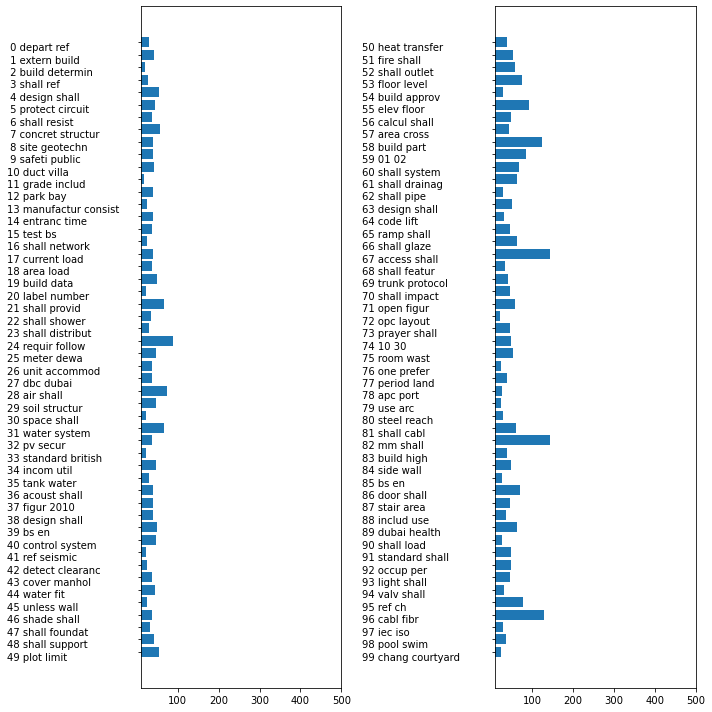

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
              for i, words in enumerate(feature_names[sorting[:, :2]])]

# two column bar chart
for col in [0, 1]:
    start = col * 50
    end = (col +1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis= 0)[start : end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha = "left", va = "top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(10,500)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad = 130)
    
plt.tight_layout()
    